In [14]:
%pylab inline
import pandas as pd
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['font.size'] = 32
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['figure.figsize'] = (7.2,4.45)
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 32
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['mathtext.fontset'] = 'stix'      
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = 3.5
mpl.rcParams['xtick.labelsize'] = 32
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['legend.fontsize'] = 32
AVAILABLE_WINDOWS = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 
                     'flattop', 'parzen', 'bohman', 'blackmanharris', 'nuttall',
                     'barthann']

def setup_axis(ax):
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.tick_params(direction='out', length=12, 
                   width=2, 
                   grid_alpha=0.5)
    ax.tick_params(direction='out', which='minor', length=6, 
                   width=1, 
                   grid_alpha=0.5)
    ax.grid(True)

Populating the interactive namespace from numpy and matplotlib


In [10]:
ribocop_df = pd.read_table('../../ORFcalling_data/ribotaper_data/ribocop_results.txt').set_index('ID')
ribocop_df = ribocop_df.rename(columns={'my_ribo': 'ribocop_pval_ribo', 'my_rna': 'ribocop_pval_rna', 'ribo_coh': 'ribocop_coherence_ribo',
                                       'rna_coh': 'ribocop_coherence_rna', 'ribo_cov': 'valid_codons_ribo', 'rna_cov': 'valid_codons_rna'})
ribocop_df.head()


,ribocop_pval_ribo,ribocop_pval_rna,ribocop_coherence_ribo,ribocop_coherence_rna,valid_codons_ribo,valid_codons_rna
ID,,,,,,
chr2_214161985_214162081_CCDS_ENSG00000144451.14,0.000257,0.001103,0.586318,0.261468,14,26
chr17_1944774_1944915_CCDS_ENSG00000108963.13,0.010997,0.097425,0.636023,0.258373,7,9
chr16_47001424_47001558_CCDS_ENSG00000069345.7,0.000355,0.791629,0.344465,0.006493,23,36
chr1_229633882_229634053_CCDS_ENSG00000069248.9,0.005641,0.578909,0.396450,0.010513,13,52
chr9_95374804_95374896_CCDS_ENSG00000188312.9,0.154219,0.460883,0.466506,0.086420,4,9


In [16]:
ribocode_df = pd.read_table('../../ORFcalling_data/ribotaper_data/ribocode_result.txt').set_index('ID')
ribocode_df = ribocode_df.rename(columns={'code_ribo': 'ribocode_pval_ribo', 'code_rna': 'ribocode_pval_rna', 'ribo_cov': 'ribocode_score_ribo', 'mRNA_cov': 'ribocode_score_rna'})
ribocode_df.head()


,annotated_frame,predict_frame,ribocode_pval_ribo,ribocode_pval_rna,ribocode_score_ribo,ribocode_score_rna
ID,,,,,,
chr10_70098259_70098399_CCDS_ENSG00000096746.13,1,1,2.098592e-11,0.289417,0.760870,0.289417
chrX_54570655_54570759_CCDS_ENSG00000130119.11,2,2,1.241161e-04,0.263237,0.352941,0.263237
chr1_40928092_40929258_CCDS_ENSG00000187801.10,2,2,1.903603e-04,0.127942,0.028351,0.127942
chr12_112924278_112924433_CCDS_ENSG00000179295.11,0,0,4.185237e-06,0.141111,0.254902,0.141111
chrX_51486722_51488606_CCDS_ENSG00000189369.7,0,0,9.639290e-03,0.382528,0.014331,0.382528


In [19]:
combined_df = ribocop_df.join(ribocode_df)
combined_df.columns

Index(['ribocop_pval_ribo', 'ribocop_pval_rna', 'ribocop_coherence_ribo',
       'ribocop_coherence_rna', 'valid_codons_ribo', 'valid_codons_rna',
       'annotated_frame', 'predict_frame', 'ribocode_pval_ribo',
       'ribocode_pval_rna', 'ribocode_score_ribo', 'ribocode_score_rna'],
      dtype='object')

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


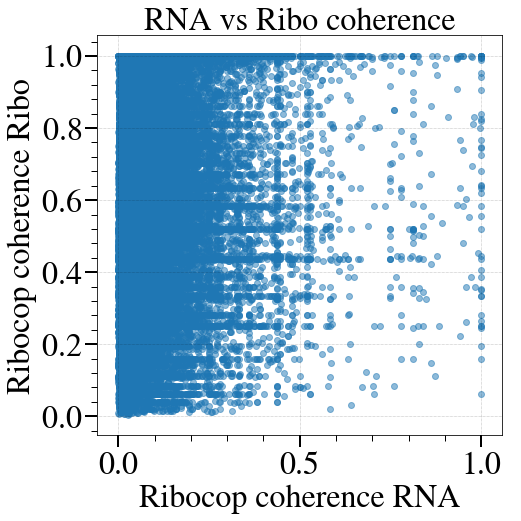

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(combined_df['ribocop_coherence_rna'], combined_df['ribocop_coherence_ribo'], alpha=0.5)
setup_axis(ax)
ax.set_title('RNA vs Ribo coherence')
ax.set_xlabel('Ribocop coherence RNA')
ax.set_ylabel('Ribocop coherence Ribo')
fig.tight_layout()

In [22]:
combined_df['ribocop_significant_ribo'] = 0
combined_df['ribocop_significant_rna'] = 0

combined_df['ribocode_significant_ribo'] = 0
combined_df['ribocode_significant_rna'] = 0


combined_df.loc[combined_df.ribocop_pval_ribo<0.05, 'ribocop_significant_ribo'] = 1
combined_df.loc[combined_df.ribocop_pval_rna<0.05,  'ribocop_significant_rna'] = 1

combined_df.loc[combined_df.ribocode_pval_ribo<0.05, 'ribocode_significant_ribo'] = 1
combined_df.loc[combined_df.ribocode_pval_rna<0.05,  'ribocode_significant_rna'] = 1


In [23]:
combined_df.head()

,ribocop_pval_ribo,ribocop_pval_rna,ribocop_coherence_ribo,ribocop_coherence_rna,valid_codons_ribo,valid_codons_rna,annotated_frame,predict_frame,ribocode_pval_ribo,ribocode_pval_rna,ribocode_score_ribo,ribocode_score_rna,ribocop_significant_rna,ribocop_significant_ribo,ribocode_significant_rna,ribocode_significant_ribo
ID,,,,,,,,,,,,,,,,
chr2_214161985_214162081_CCDS_ENSG00000144451.14,0.000257,0.001103,0.586318,0.261468,14,26,1.0,0.0,0.000564,0.002866,0.375000,0.002866,1,1,1,1
chr17_1944774_1944915_CCDS_ENSG00000108963.13,0.010997,0.097425,0.636023,0.258373,7,9,0.0,0.0,0.002792,0.089856,0.127660,0.089856,0,1,0,1
chr16_47001424_47001558_CCDS_ENSG00000069345.7,0.000355,0.791629,0.344465,0.006493,23,36,1.0,1.0,0.000018,0.375417,0.386364,0.375417,0,1,0,1
chr1_229633882_229634053_CCDS_ENSG00000069248.9,0.005641,0.578909,0.396450,0.010513,13,52,0.0,0.0,0.001259,0.752762,0.175439,0.752762,0,1,0,1
chr9_95374804_95374896_CCDS_ENSG00000188312.9,0.154219,0.460883,0.466506,0.086420,4,9,1.0,1.0,0.088966,0.096495,0.100000,0.096495,0,0,0,0


In [29]:
combined_df.shape

(51280, 16)

In [27]:
ribocop_both_significant = combined_df.query(' (ribocop_significant_ribo== 1) & (ribocop_significant_rna==1)')
ribocop_both_significant.shape

(6608, 16)

In [28]:
ribocode_both_significant = combined_df.query(' (ribocode_significant_ribo== 1) & (ribocode_significant_rna==1)')
ribocode_both_significant.shape

(8559, 16)

In [ ]:
ribocop_both_significant

(0, 100)

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


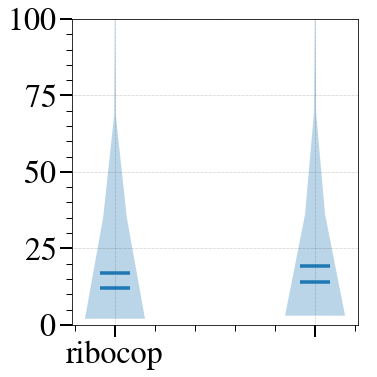

In [39]:
data = [ribocode_both_significant.valid_codons_ribo, ribocop_both_significant.valid_codons_ribo]

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticklabels(['ribocode', 'ribocop'])
setup_axis(ax)
ax.violinplot(data, [1, 2], points=20, widths=0.3,
              showmeans=True, showextrema=False, showmedians=True)
ax.set_ylim(0, 100)


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


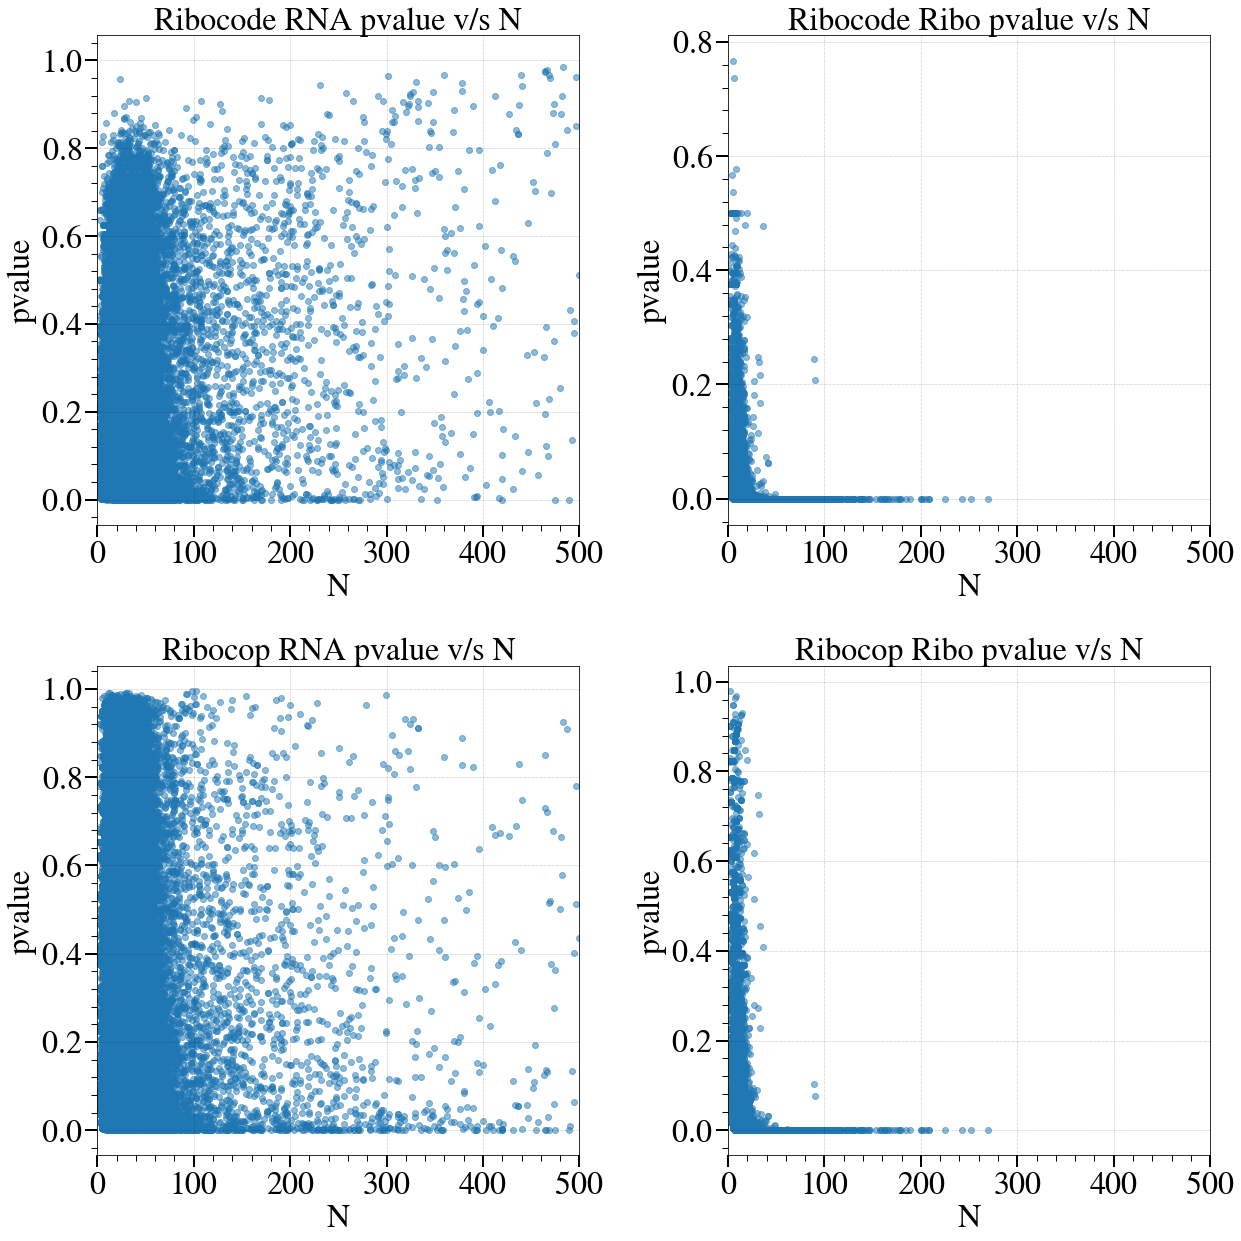

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
ax = axes[0, 0]
ax.scatter( combined_df['valid_codons_rna'], -np.log10(combined_df['ribocode_pval_rna']), alpha=0.5)
setup_axis(ax)
ax.set_title('Ribocode RNA pvalue v/s N')
ax.set_xlabel('N')
ax.set_ylabel('pvalue')
ax.set_xlim(0, 500)

ax = axes[0, 1]
ax.scatter( combined_df['valid_codons_ribo'], -np.log10(combined_df['ribocode_pval_ribo']), alpha=0.5)
setup_axis(ax)
ax.set_title('Ribocode Ribo pvalue v/s N')
ax.set_xlabel('N')
ax.set_ylabel('pvalue')
ax.set_xlim(0, 500)

ax = axes[1, 0]
ax.scatter( combined_df['valid_codons_rna'], -np.log10(combined_df['ribocop_pval_rna']), alpha=0.5)
setup_axis(ax)
ax.set_title('Ribocop RNA pvalue v/s N')
ax.set_xlabel('N')
ax.set_ylabel('pvalue')
ax.set_xlim(0, 500)

ax = axes[1, 1]
ax.scatter( combined_df['valid_codons_ribo'], combined_df['ribocop_pval_ribo'], alpha=0.5)
setup_axis(ax)
ax.set_title('Ribocop Ribo pvalue v/s N')
ax.set_xlabel('N')
ax.set_ylabel('pvalue')
ax.set_xlim(0, 500)


fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( combined_df['valid_codons_rna'], combined_df['ribocode_pval_rna'], alpha=0.5)
setup_axis(ax)
#ax.set_xscale('log')

ax.set_title('Ribocop RNA pvalue v/s N')
ax.set_xlabel('N')
ax.set_ylabel('pvalue')
ax.set_xlim(0, 500)
fig.tight_layout()